In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 6
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((521, 12, 1), (521,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT6/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2182 - root_mean_squared_error: 0.4671

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 8s 102ms/step - loss: 0.2136 - root_mean_squared_error: 0.4621 - val_loss: 0.1873 - val_root_mean_squared_error: 0.4327
Epoch 2/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1558 - root_mean_squared_error: 0.3947

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1543 - root_mean_squared_error: 0.3928 - val_loss: 0.1623 - val_root_mean_squared_error: 0.4029
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1237 - root_mean_squared_error: 0.3517

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1256 - root_mean_squared_error: 0.3544 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1018 - root_mean_squared_error: 0.3190

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.1021 - root_mean_squared_error: 0.3196 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3436
Epoch 5/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0805 - root_mean_squared_error: 0.2837

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0770 - root_mean_squared_error: 0.2775 - val_loss: 0.0980 - val_root_mean_squared_error: 0.3130
Epoch 6/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0595 - root_mean_squared_error: 0.2440

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0605 - root_mean_squared_error: 0.2460 - val_loss: 0.0826 - val_root_mean_squared_error: 0.2875
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0507 - root_mean_squared_error: 0.2252

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0476 - root_mean_squared_error: 0.2181 - val_loss: 0.0668 - val_root_mean_squared_error: 0.2585
Epoch 8/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1963

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0363 - root_mean_squared_error: 0.1904 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2363
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1697

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2129
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1504

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0233 - root_mean_squared_error: 0.1525 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1339

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 12/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1265

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1256

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0163 - root_mean_squared_error: 0.1275 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 14/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1246

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 15/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0154 - root_mean_squared_error: 0.1242 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 16/50
52/53 [============================>.] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1299

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 17/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823
Epoch 18/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1296

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0062 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0549
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0166 - root_mean_squared_error: 0.1287 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 31/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.1260

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0153 - root_mean_squared_error: 0.1237 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 34/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 36/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1246

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0529
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0561
Epoch 38/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0578
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 40/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 41/50
52/53 [============================>.] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.1218

INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


INFO:tensorflow:Assets written to: Baffin_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 43/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 46/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0034 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8115245779355367 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

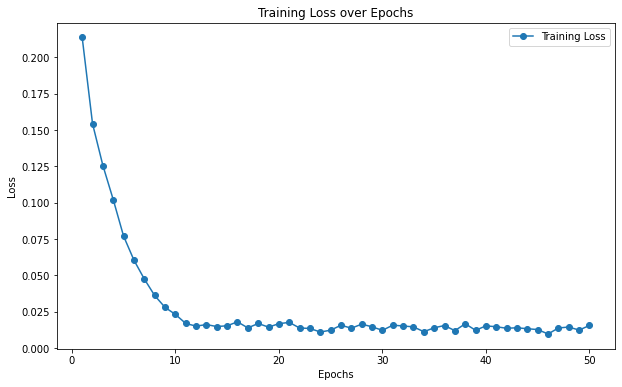

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

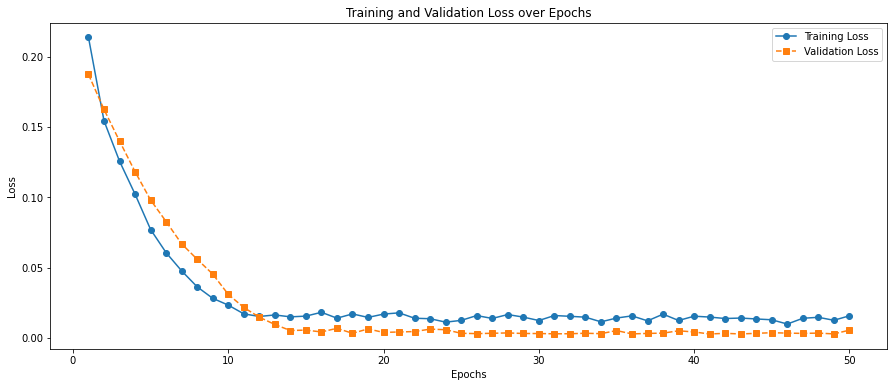

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT6/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 13ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.06445737034858848


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.052478974491847206


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

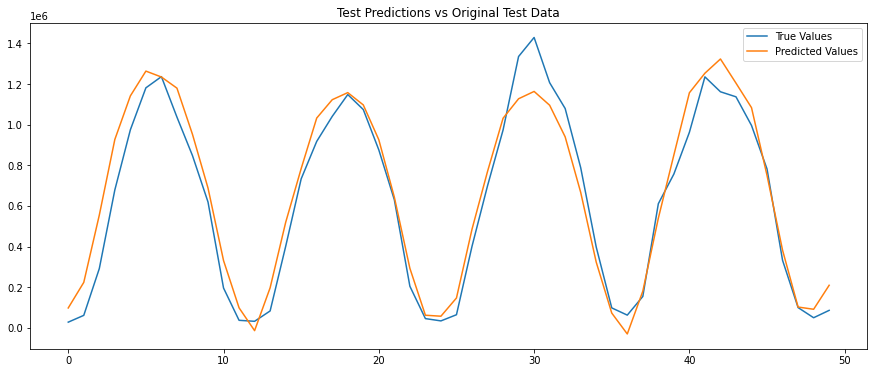

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004039158733619781


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.05085646085738829


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

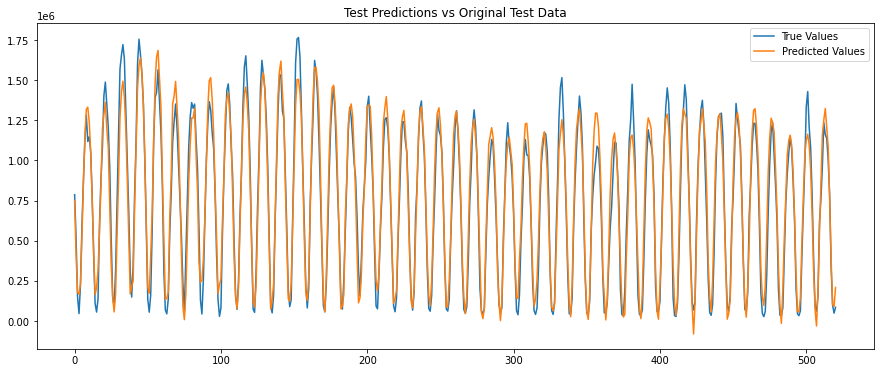

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()